In [9]:
import numpy as np
import os
import cv2
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def import_images(img_names):
    imgs = [cv2.imread(img_name, 1)[:,:,::-1] for img_name in img_names]
    return np.array(imgs)

def import_target(path):
    f = open(os.path.join(path, "target.csv"))
    lines = f.read().split('\n')
    toks = [line.split(',') for line in lines]
    toks = toks[1:-1]
    return np.array([int(float(tok[2])) for tok in toks])

def import_data(N):
    img_folder = os.path.join("images")
    img_names = os.listdir(img_folder)
    img_paths = [os.path.join(img_folder, img_name) for img_name in img_names]
    X_all = import_images(img_paths[:N])
    Y_all = import_target("")[:N]
    return X_all, Y_all

def resize_all(X):
    return np.array([cv2.resize(x,dsize=(200,150)) for x in X])

def binary_color(img):
    img = np.float32(img/255)
    x,y,z = img.shape
    img_vec = img.reshape(x*y, z)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img_vec)
    color_mapping = kmeans.cluster_centers_[kmeans.labels_].reshape(x,y,z)
    return color_mapping

In [3]:
X_all, Y_all = import_data(100)

In [10]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

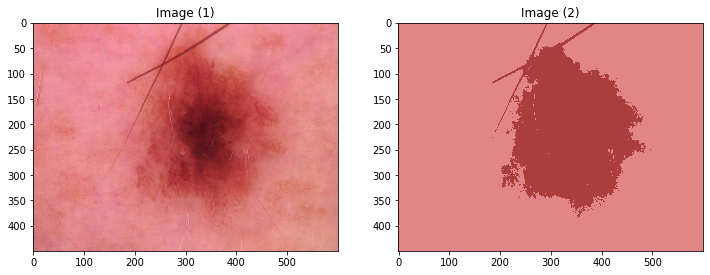

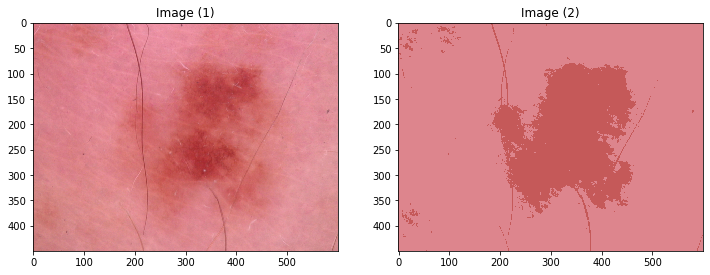

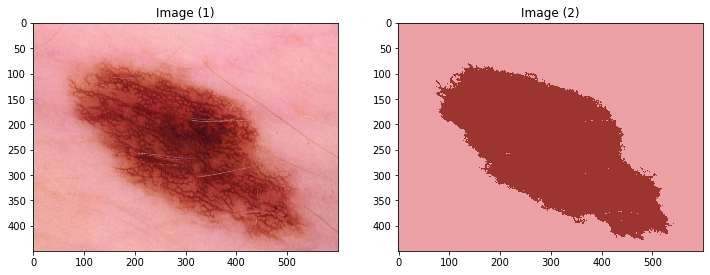

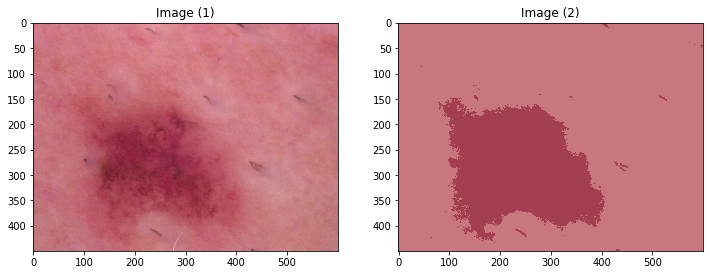

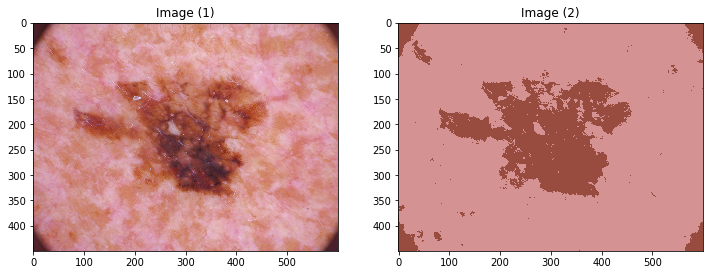

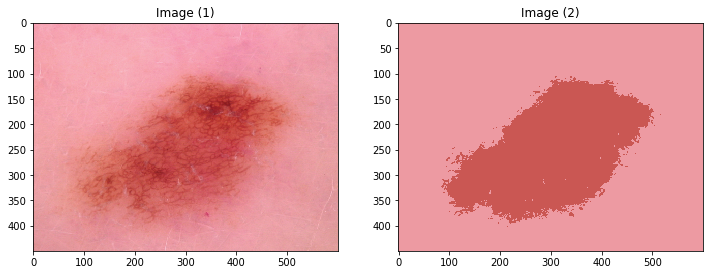

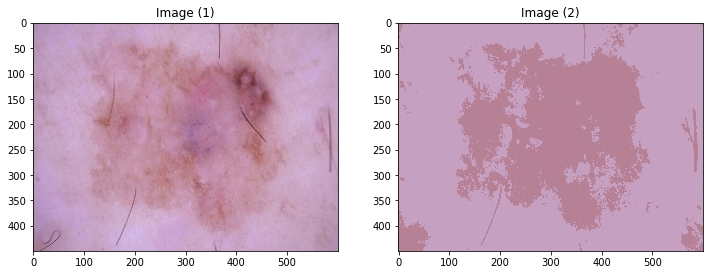

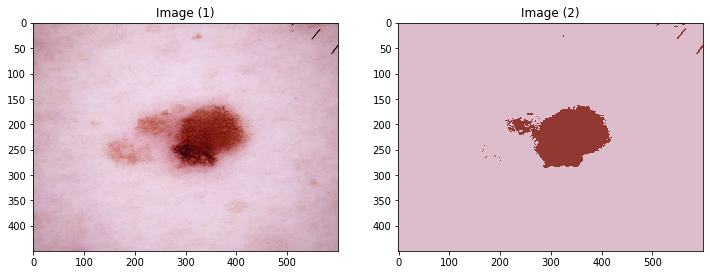

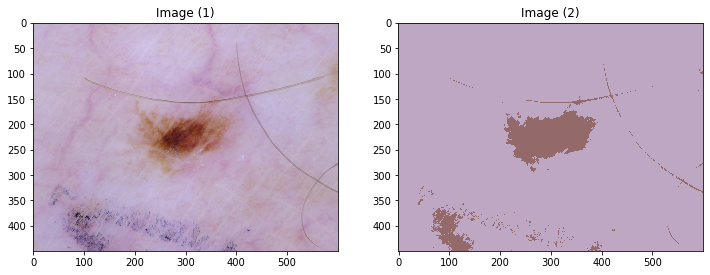

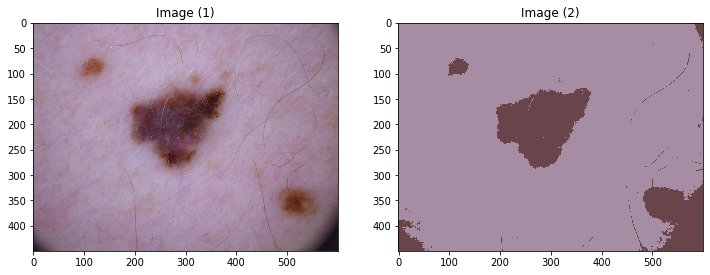

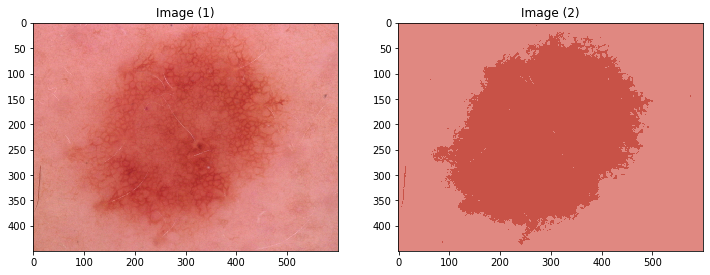

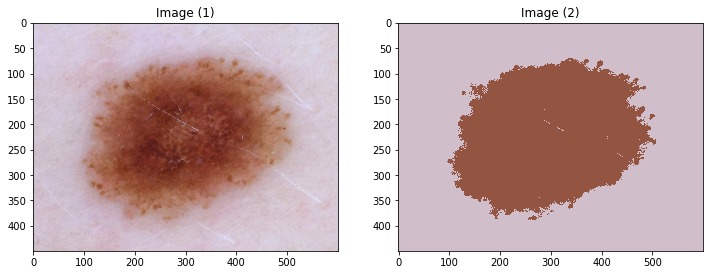

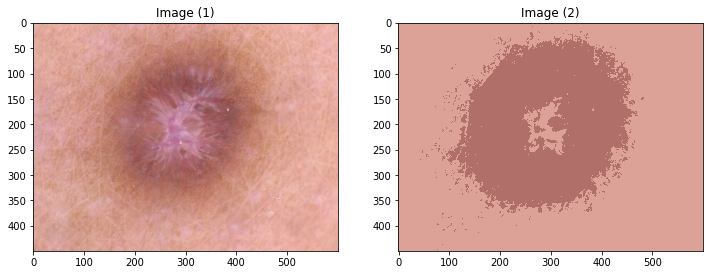

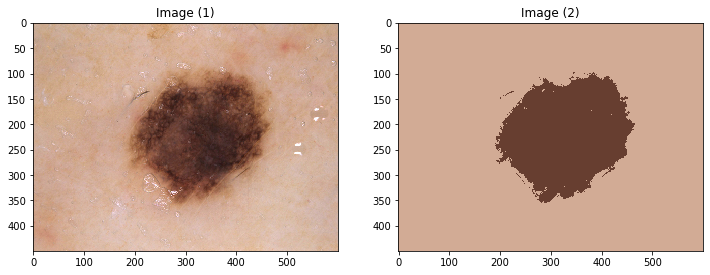

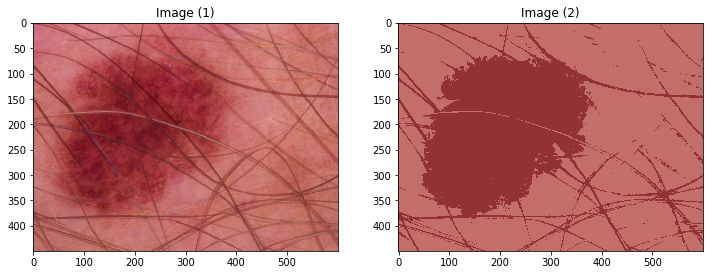

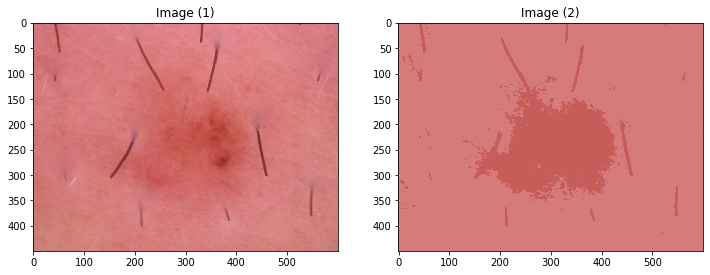

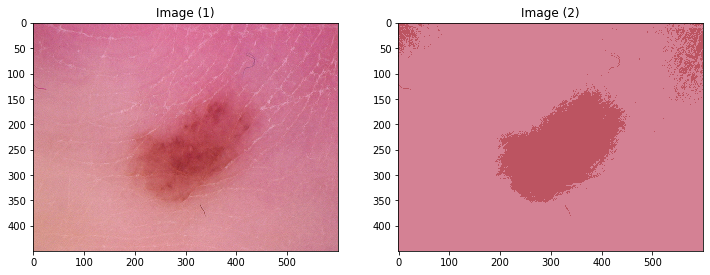

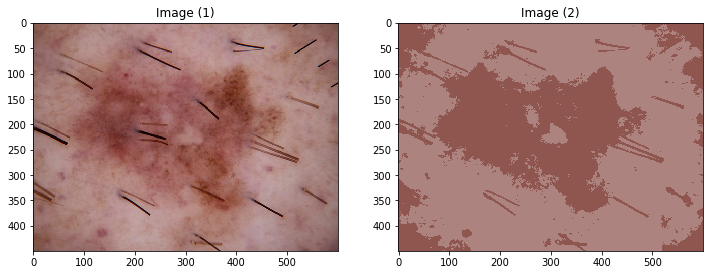

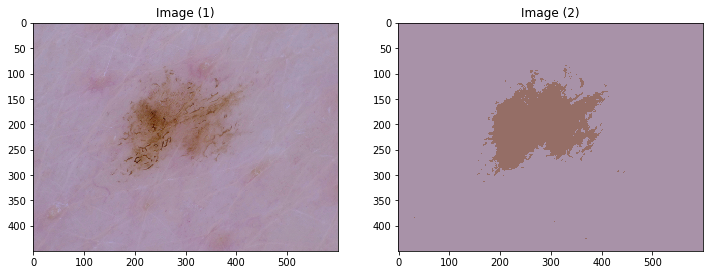

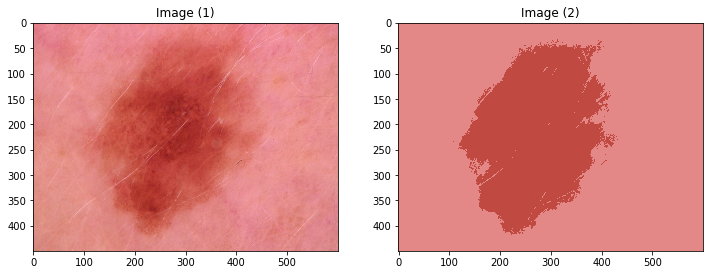

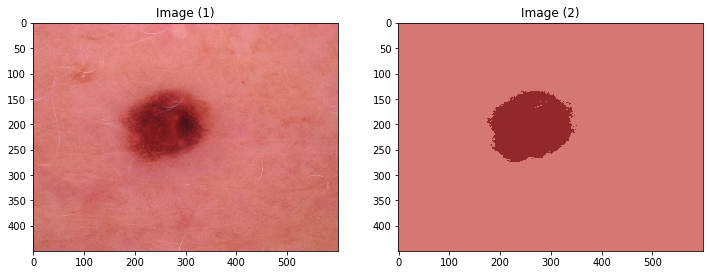

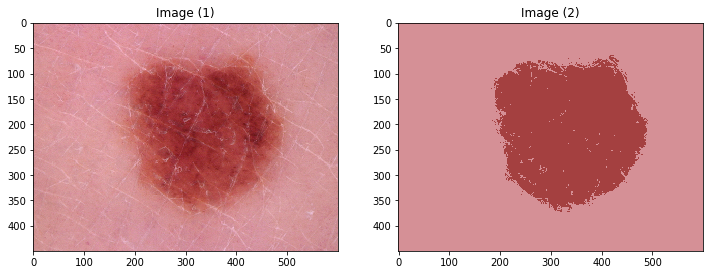

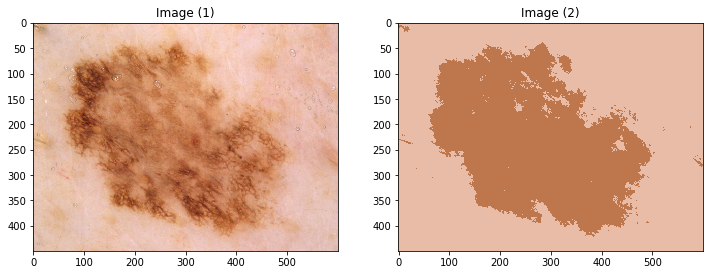

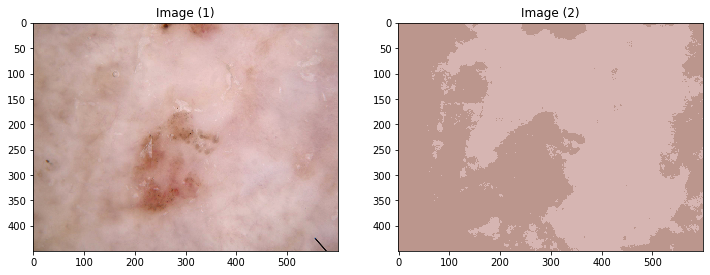

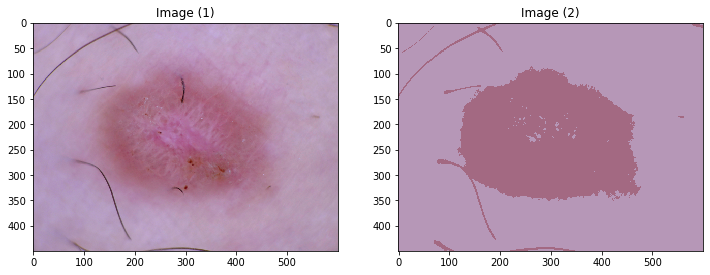

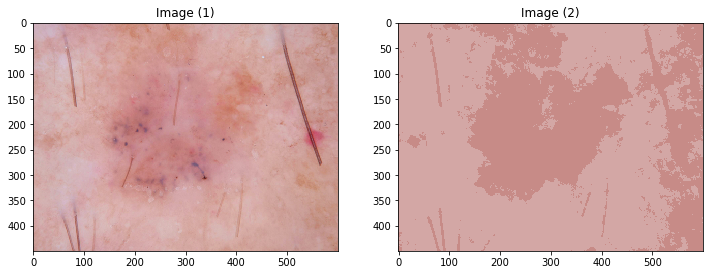

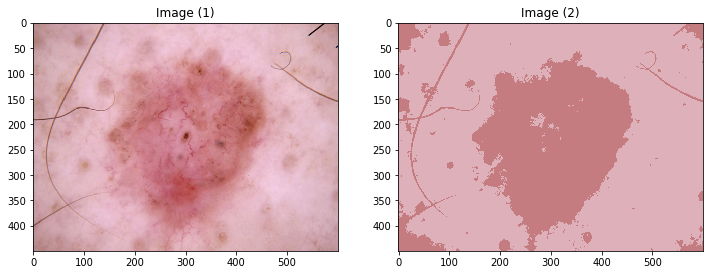

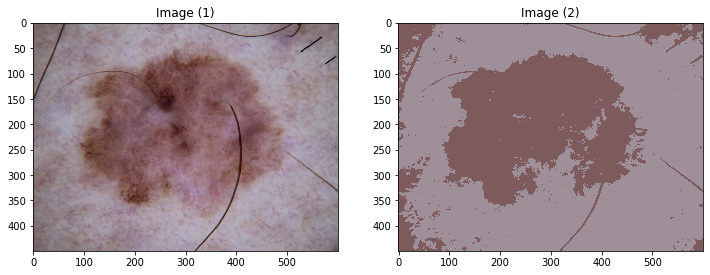

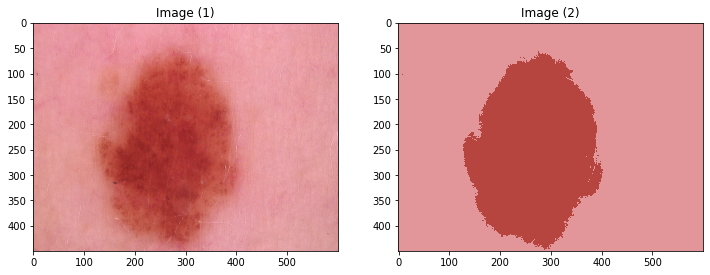

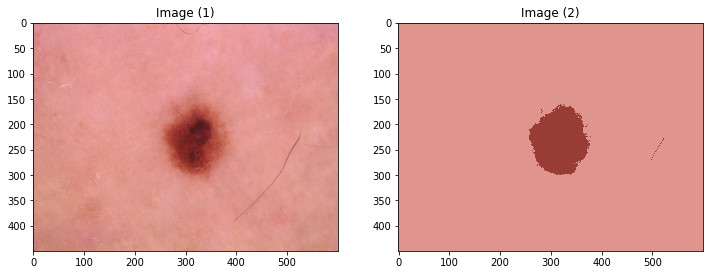

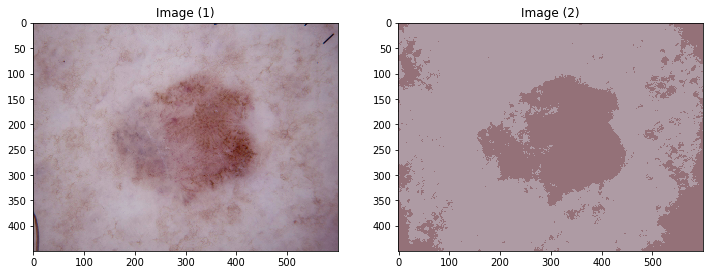

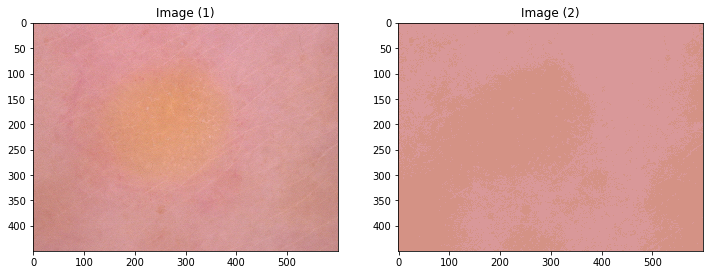

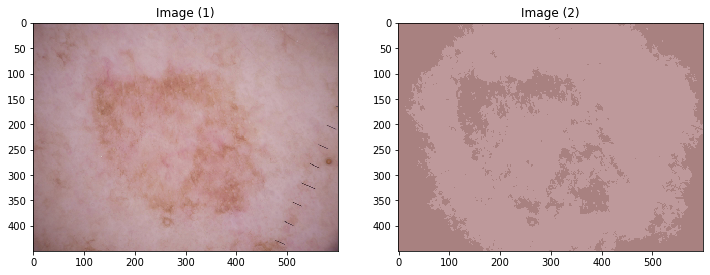

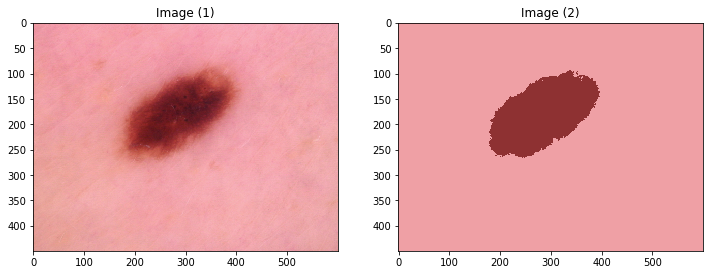

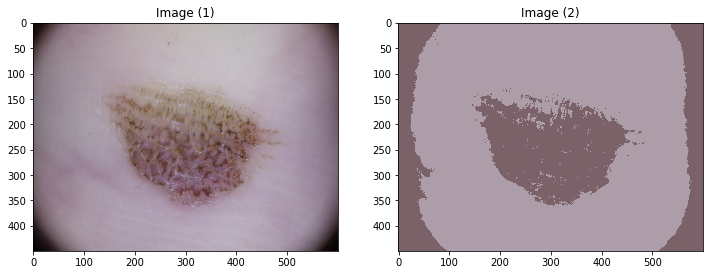

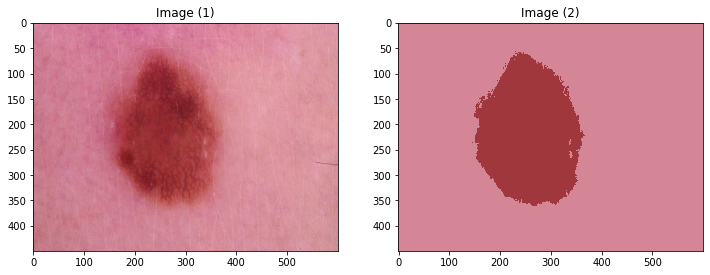

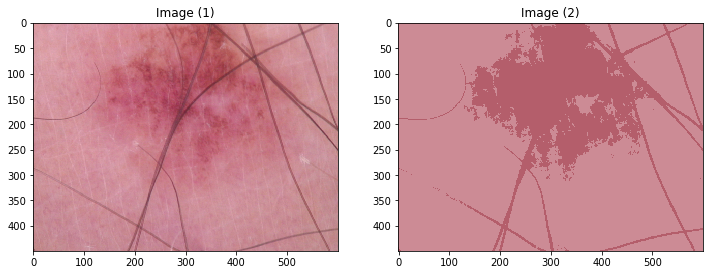

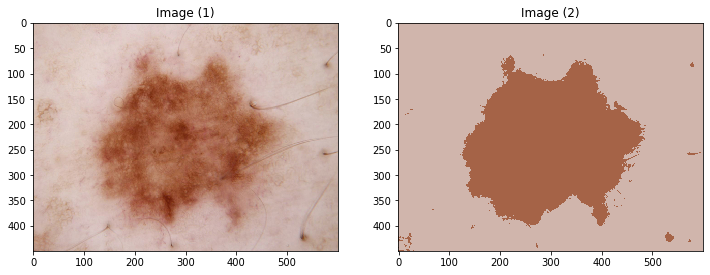

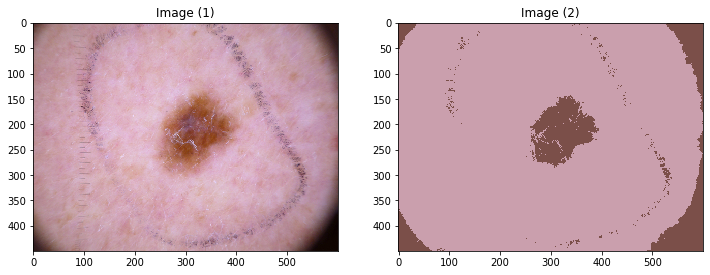

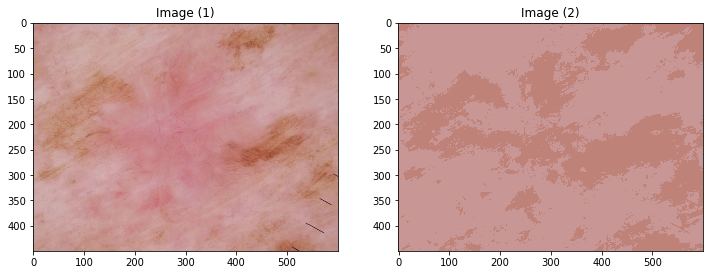

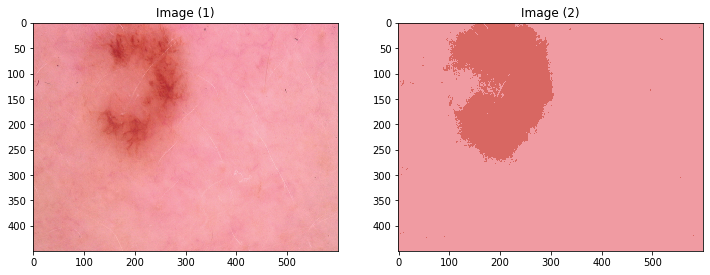

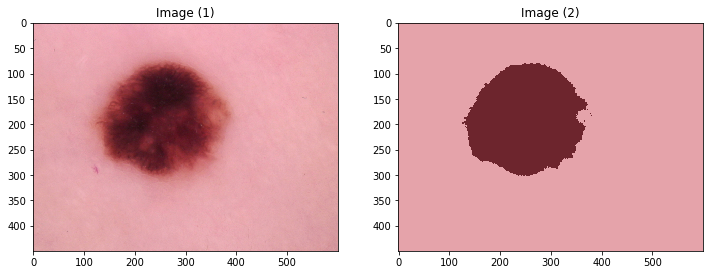

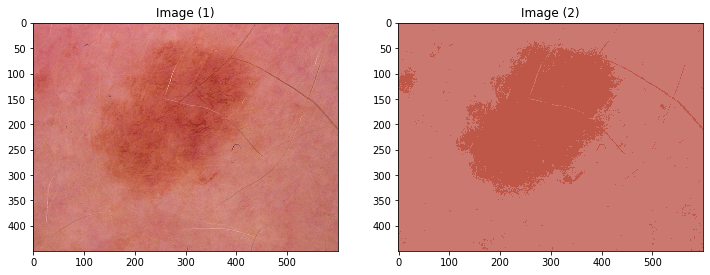

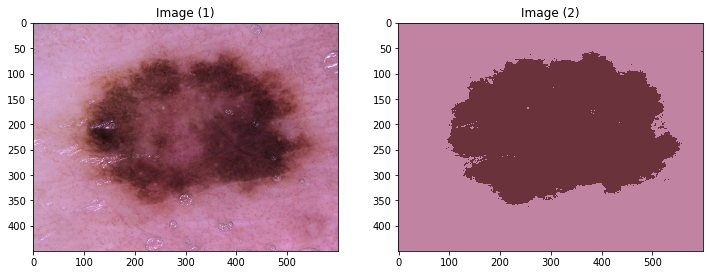

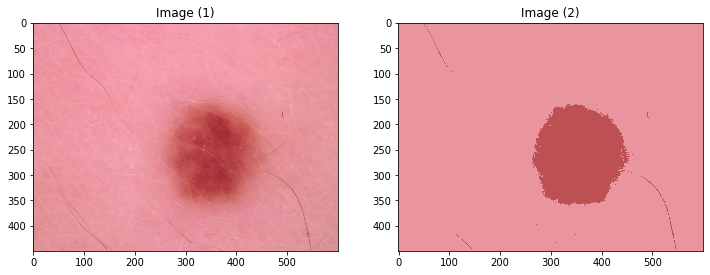

KeyboardInterrupt: 

In [13]:
for i in range(len(X_all)):
    show_images((X_all[i], binary_color(X_all[i])))